In [1]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

# controls default text sizes
plt.rc('lines',markersize=8)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
# Importing files
REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Sartorious_experiments'
std = '817'


In [3]:
#Load data frame
df_man = pd.read_csv(folder+r'\Cleaned_Data\Viscosity_std_'+std+'_modified.csv')

#Calcualte means
df_duplicates = df_man.where(df_man.duplicated('iteration',keep=False)==True).dropna(how='all')
df_incomplete = df_man.where(df_man.duplicated('iteration',keep=False)==False).dropna(how='all')
df_mean = pd.DataFrame(columns= df_man.columns)

for index,values in df_duplicates.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    if len(df_duplicates.loc[index:index+2]) == 3:
        mean_error =df_duplicates.loc[index:index+2,'%error'].mean()
        df_duplicates.loc[index,'%error'] = mean_error
        df_duplicates.loc[index, 'volume'] ='mean'+str([300, 500, 1000])
        df_mean = pd.concat([df_mean,df_man.loc[index:index+2],df_duplicates.loc[[index]]])
    else:
        df_incomplete = pd.concat([df_incomplete,df_duplicates.loc[index:index+2]]).drop_duplicates()
df_mean = pd.concat([df_mean,df_incomplete])
df_man = df_mean.reset_index(drop=True)   

#Calculate iteration 
counter =1 
for row in df_man.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_man.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_man.loc[index,'iteration']=counter
    counter+=1


In [4]:
#Load dataframe
df_exp2 = pd.read_csv(folder+r'\Code\Viscosity_std_'+std+'_BOTorch_exp2.csv')

#Calculate iterations
counter =1 
for i in range(0,len(df_exp2)+1,3):
    if len(df_exp2.loc[i:i+2,'volume'].drop_duplicates())==1:
        df_exp2.loc[i,'iteration']=counter
        counter+=1    
        df_exp2.loc[i+1,'iteration']=counter
        counter+=1  
        df_exp2.loc[i+2,'iteration']=counter
        counter+=1          
    else:
        df_exp2.loc[i:i+2,'iteration']=counter
        counter+=1



In [5]:
#Load data frame
df_exp3 = pd.read_csv(folder+r'\Code\Viscosity_std_'+std+'_BOTorch_exp3.csv')

#Calculate iteration number
counter =1 
for row in df_exp3.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_exp3.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_exp3.loc[index,'iteration']=counter
    counter+=1

#Edit volumes to be all the same 
volumes = ['1000.0','500.0','300.0']
for volume in volumes:
    index = df_exp3.where(df_exp3.volume==volume).dropna(how='all').index
    df_exp3.loc[index,'volume'] = volume[:-2]

#Recalculate mean
for i in range(3,len(df_exp3),4):
    df_exp3.loc[i,'%error'] = df_exp3.loc[i-3:i,'%error'].mean()




#### Plot for exp2 and manual calibration

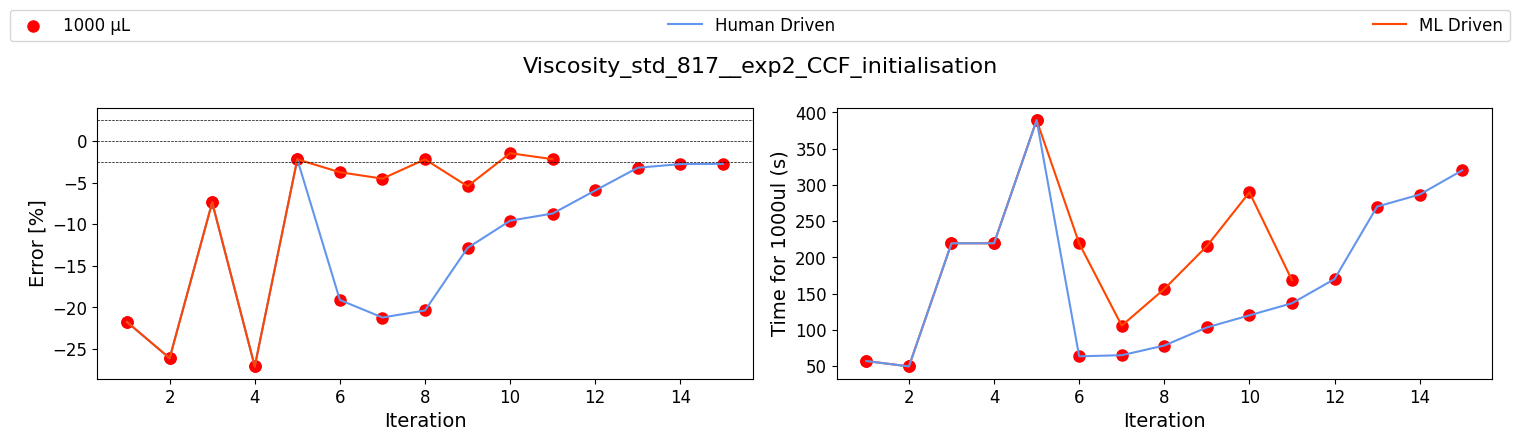

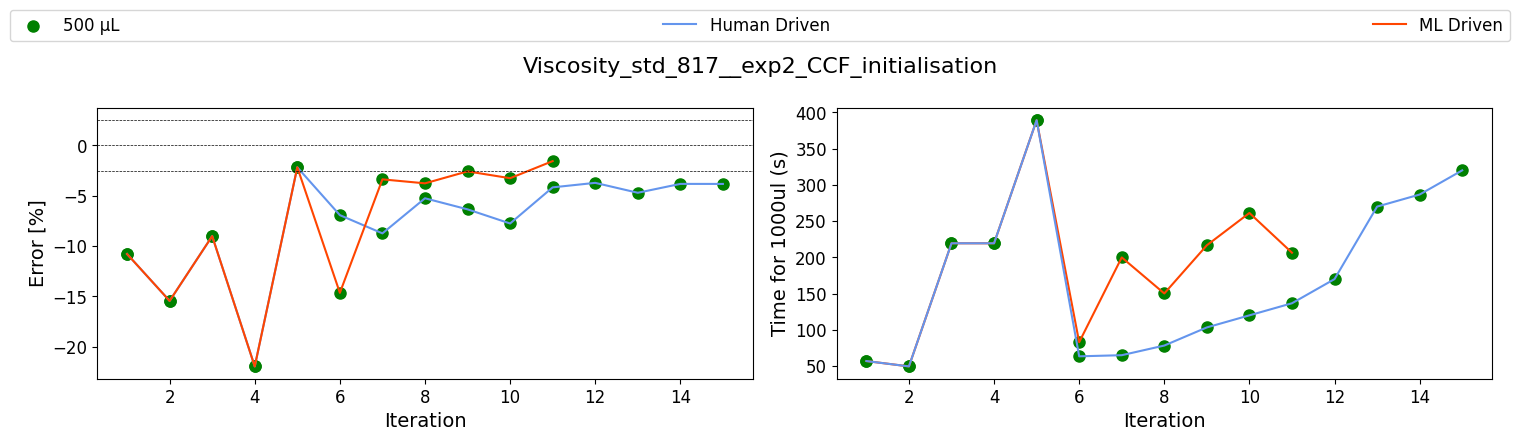

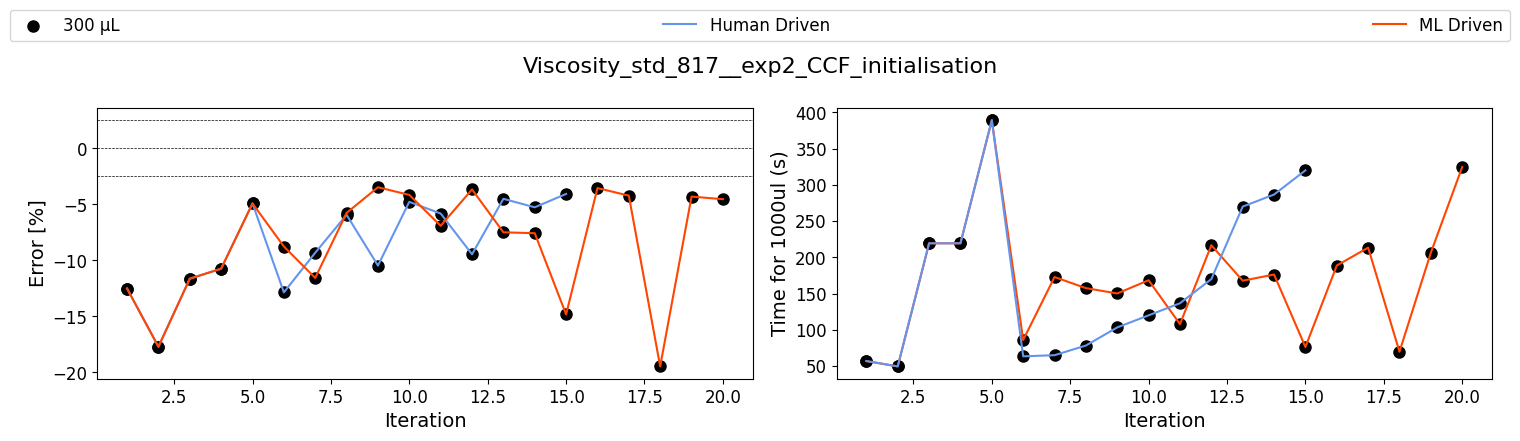

In [7]:
#Makes a figure with manual and ML calibrations, one per volume

for volume in [1000,500,300]:
    df_exp2_plot = df_exp2.where(df_exp2.volume==volume).dropna(how='all').copy()
    df_man_plot = df_man.where(df_man.volume==volume).dropna(how='all').copy()
    #Making subplots (2 rows, 1 column)
    fig,axs = plt.subplots(1,2)

    # Plotting graph 1: Iteration against error
    if volume == 1000:
        color = 'red'
    elif volume== 500:
        color = 'green'
    elif volume ==300:
        color = 'black'    
    
    if len(df_man) != 0:
        axs.flatten()[0].scatter(df_man_plot['iteration'],df_man_plot['%error'], marker= 'o', label = str(volume)+u' \u03bcL', c = color)
        axs.flatten()[0].plot(df_man_plot['iteration'],df_man_plot['%error'], label = 'Human Driven', c = 'cornflowerblue')
   
    if len(df_exp2) != 0:
        axs.flatten()[0].scatter(df_exp2_plot['iteration'],df_exp2_plot['%error'], marker= 'o', c = color)
        axs.flatten()[0].plot(df_exp2_plot['iteration'],df_exp2_plot['%error'], label = 'ML Driven', c = 'orangered')
    
    
    axs.flatten()[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].set_xlabel('Iteration')
    axs.flatten()[0].set_ylabel('Error [%]')



    axs.flatten()[1].scatter(df_exp2_plot['iteration'],df_exp2_plot['time_asp_1000'], marker= 'o', c = color)
    axs.flatten()[1].plot(df_exp2_plot['iteration'],df_exp2_plot['time_asp_1000'],  c = 'orangered')

    axs.flatten()[1].scatter(df_man_plot['iteration'],df_man_plot['time_for_1000'], marker= 'o', c = color)
    axs.flatten()[1].plot(df_man_plot['iteration'],df_man_plot['time_for_1000'], c = 'cornflowerblue')


    axs.flatten()[1].set_xlabel('Iteration')
    axs.flatten()[1].set_ylabel('Time for 1000ul (s)')

    fig.set_size_inches(15, 4)
    fig.suptitle('Viscosity_std_'+std+'_'+'_exp2_CCF_initialisation')
    fig.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=5, mode="expand", borderaxespad=0.)
    fig.tight_layout()

    REPO = 'viscosity_liquid_transfer_Pablo'
    folder = os.getcwd().split(REPO)[0]+REPO+r'\Sartorious_experiments\Finalised_Data'
    # fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_exp2_line.png')

ValueError: Can only compare identically-labeled Series objects

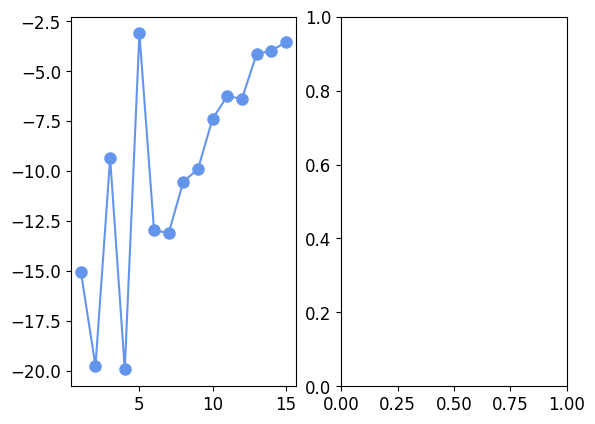

In [31]:
#Making subplots (2 rows, 2 column)
fig,axs = plt.subplots(1,2)

# Dropping NAN rows
df_man_1000 = df_man.where(df_man.volume==1000).dropna(how='all')
df_man_500 = df_man.where(df_man.volume==500).dropna(how='all')
df_man_300 = df_man.where(df_man.volume==300).dropna(how='all')
df_man_100 = df_man.where(df_man.volume==100).dropna(how='all')
df_man_mean = df_man.where(df_man.volume=='mean[300, 500, 1000]').dropna(how='all')


df_exp3_1000 = df_exp3.where(df_exp3.volume=='1000').dropna(how='all')
df_exp3_500 = df_exp3.where(df_exp3.volume=='500').dropna(how='all')
df_exp3_300 = df_exp3.where(df_exp3.volume=='300').dropna(how='all')
df_exp3_100 = df_exp3.where(df_exp3.volume=='100').dropna(how='all')
df_exp3_mean = df_exp3.where(df_exp3.volume=='mean[300, 500, 1000]').dropna(how='all')

#find min error

df_exp3_mean_min_iteration = df_exp3_mean.copy()[['iteration','%error']].abs().sort_values('%error').iloc[0:3,0]
df_man_mean_min_iteration = df_man_mean.copy()[['iteration','%error']].abs().sort_values('%error').iloc[0:3,0]

#make new datadrame with minimimum mean error values for manual calibration data
man_min_iter_list = df_man_mean_min_iteration.to_list()
df_man_min = pd.DataFrame()
for value in man_min_iter_list:
    df = df_man[df_man['iteration'] == value]
    df_man_min = pd.concat([df_man_min,df], ignore_index=True) 

#make new datadrame with minimimum mean error values for exp3 data
exp3_min_iter_list = df_exp3_mean_min_iteration.to_list()
df_exp3_min = pd.DataFrame()
for value in exp3_min_iter_list:
    df = df_exp3[df_exp3['iteration'] == value]
    df_exp3_min = pd.concat([df_exp3_min,df], ignore_index=True) 


# Plotting graph 1: Iteration against error
if len(df_man_mean) != 0:
    axs.flatten()[0].plot(df_man_mean['iteration'],df_man_mean['%error'],marker= 'o', label = 'Human Driven mean', c = 'cornflowerblue')

if len(df_man_1000) != 0:
    axs.flatten()[0].scatter(df_man_1000.where(df_man_1000['iteration']==df_man_mean_min_iteration).dropna()['iteration'],df_man_1000.where(df_man_1000['iteration']==df_man_mean_min_iteration).dropna()['%error'], marker= 'x', c = 'red')

if len(df_man_500) != 0:
    axs.flatten()[0].scatter(df_man_500.where(df_man_500['iteration']==df_man_mean_min_iteration).dropna()['iteration'],df_man_500.where(df_man_500['iteration']==df_man_mean_min_iteration).dropna()['%error'], marker= 'x', c = 'green')

if len(df_man_300) != 0:
    axs.flatten()[0].scatter(df_man_300.where(df_man_300['iteration']==df_man_mean_min_iteration).dropna()['iteration'],df_man_300.where(df_man_300['iteration']==df_man_mean_min_iteration).dropna()['%error'], marker= 'x', c = 'black')


if len(df_exp3_mean) != 0:
    axs.flatten()[0].plot(df_exp3_mean['iteration'],df_exp3_mean['%error'],marker= 'o', label='ML Driven mean',c = 'orangered')


if len(df_exp3_1000) != 0:
    axs.flatten()[0].scatter(df_exp3_1000.where(df_exp3_1000['iteration']==df_exp3_mean_min_iteration).dropna()['iteration'],df_exp3_1000.where(df_exp3_1000['iteration']==df_exp3_mean_min_iteration).dropna()['%error'], marker= 'x', c = 'red')


if len(df_exp3_500) != 0:
    axs.flatten()[0].scatter(df_exp3_500.where(df_exp3_500['iteration']==df_exp3_mean_min_iteration).dropna()['iteration'],df_exp3_500.where(df_exp3_500['iteration']==df_exp3_mean_min_iteration).dropna()['%error'], marker= 'x', c = 'green')

if len(df_exp3_300) != 0:
    axs.flatten()[0].scatter(df_exp3_300.where(df_exp3_300['iteration']==df_exp3_mean_min_iteration).dropna()['iteration'],df_exp3_300.where(df_exp3_300['iteration']==df_exp3_mean_min_iteration).dropna()['%error'], marker= 'x', c = 'black')

for i in range(len(axs.flatten())-1):
    axs.flatten()[i].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].set_xlabel('Iteration')
    axs.flatten()[i].set_ylabel('Error [%]')



if len(df_exp3_mean) != 0:
    axs.flatten()[1].plot(df_exp3_mean['iteration'],df_exp3_mean['time_asp_1000'], marker ='o', c = 'orangered')


axs.flatten()[1].plot(df_man_mean['iteration'],df_man_1000['time_for_1000'], marker= 'o', c = 'cornflowerblue')

axs.flatten()[1].set_xlabel('Iteration')
axs.flatten()[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(15, 4)
fig.suptitle('Viscosity standard '+str(std)+ 'cp batch volume optimization')
fig.legend( loc='upper right',ncol=1, borderaxespad=0.)
fig.tight_layout()

REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Sartorious_experiments\Finalised_Data'
# fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_exp2_line.png')





In [30]:
exp3_min_iter_list = df_exp3_mean_min_iteration.to_list()
df_exp3_min = pd.DataFrame()
for value in exp3_min_iter_list:
    df = df_exp3[df_exp3['iteration'] == value]
    df_exp3_min = pd.concat([df_exp3_min,df], ignore_index=True) 




,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out,delay_aspirate,delay_dispense,delay_blow_out,density,time,m,%error,Transfer_Observation,Comment,iteration,time_asp_1000,acq_value
0,Viscosity_std_817,rLine1000,1000,16.438385,7.963184,False,10.0,10.0,0.0,0.8466,249.833706,0.841746,-0.573375,Complete Transfer,Blowout before,9.0,206.411129,21.75652258952433
1,Viscosity_std_817,rLine1000,500,16.438385,7.963184,False,10.0,10.0,0.0,0.8466,156.815916,0.414636,-2.046668,Complete Transfer,Blowout before,9.0,206.411129,21.75652258952433
2,Viscosity_std_817,rLine1000,300,16.438385,7.963184,False,10.0,10.0,0.0,0.8466,119.425317,0.245917,-3.174586,Complete Transfer,Blowout before,9.0,206.411129,21.75652258952433
3,Viscosity_std_817,rLine1000,"mean[300, 500, 1000]",16.438385,7.963184,False,10.0,10.0,0.0,0.8466,249.833706,0.841746,-1.931543,Complete Transfer,Blowout before,9.0,206.411129,21.75652258952433
4,Viscosity_std_817,rLine1000,1000,6.699781,10.184027,False,10.0,10.0,0.0,0.8466,312.327760,0.833805,-1.511394,Complete Transfer,Blowout before,14.0,267.451605,9.17157142712005
5,Viscosity_std_817,rLine1000,500,6.699781,10.184027,False,10.0,10.0,0.0,0.8466,187.081029,0.410673,-2.982966,Complete Transfer,Blowout before,14.0,267.451605,9.17157142712005
6,Viscosity_std_817,rLine1000,300,6.699781,10.184027,False,10.0,10.0,0.0,0.8466,137.673835,0.243396,-4.167108,Complete Transfer,Blowout before,14.0,267.451605,9.17157142712005
7,Viscosity_std_817,rLine1000,"mean[300, 500, 1000]",6.699781,10.184027,False,10.0,10.0,0.0,0.8466,312.327760,0.833805,-2.887156,Complete Transfer,Blowout before,14.0,267.451605,9.17157142712005
8,Viscosity_std_817,rLine1000,1000,5.416312,5.416312,False,10.0,10.0,0.0,0.8466,432.740810,0.827874,-2.211897,Complete Transfer,Blowout before,5.0,389.254954,None
9,Viscosity_std_817,rLine1000,500,5.416312,5.416312,False,10.0,10.0,0.0,0.8466,248.146618,0.414068,-2.180917,Complete Transfer,Blowout before,5.0,389.254954,None
